### Data space (domain space, feature space)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


##### function plots
We have seen that a function plot depicts a ***functional*** relation between an ***independent*** and a ***dependent*** variable $y = f(x)$.

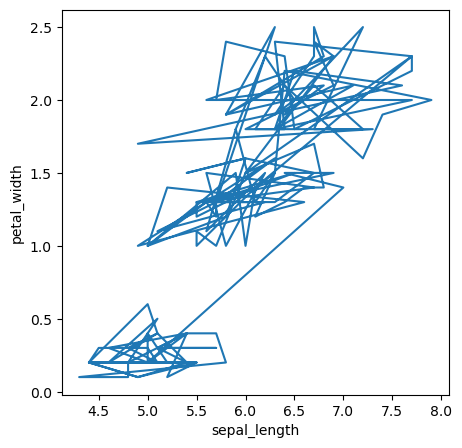

In [3]:
fig = plt.figure(figsize = (5, 5))
axs = fig.add_subplot()
axs.plot(iris.sepal_length, iris.petal_width)
axs.set_xlabel('sepal_length')
axs.set_ylabel('petal_width');

### scatter plots: 
- Scatter plots ***are not function plots***
- A scatter plot represents the distribution of the dataset in the domain space of the data.
- Each datapoint in the dataset is represented as a dot in the plot.
- The coordinates of the dots are the values of the datapoint components (called features or variables).
- Scatter plots are used to visualize relationships between variables.

#### 2D scatter-plot

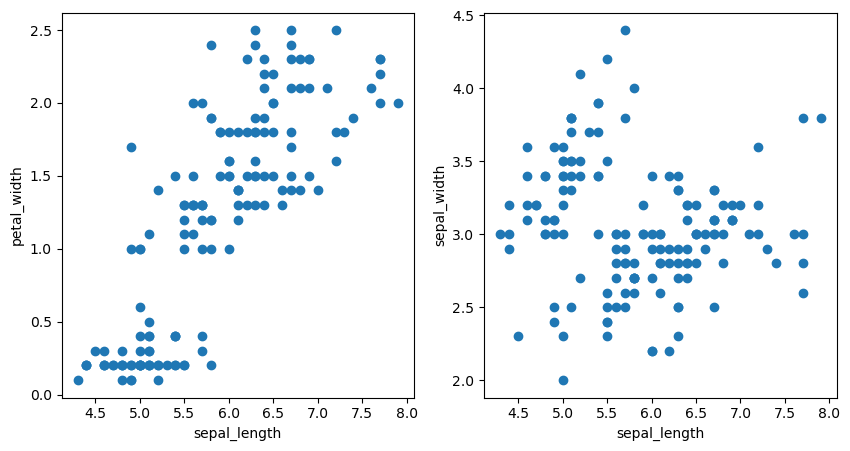

In [4]:
# 2D scatter plot
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
axs[0].scatter(iris.sepal_length, iris.petal_width, marker = 'o')
axs[0].set_xlabel('sepal_length')
axs[0].set_ylabel('petal_width');
axs[1].scatter(iris.sepal_length, iris.sepal_width, marker = 'o')
axs[1].set_xlabel('sepal_length')
axs[1].set_ylabel('sepal_width');

#### 3D scatter-plot
- join visualization of 3 features in the data space (the most we can do)

Text(0.5, 0, 'petal_width')

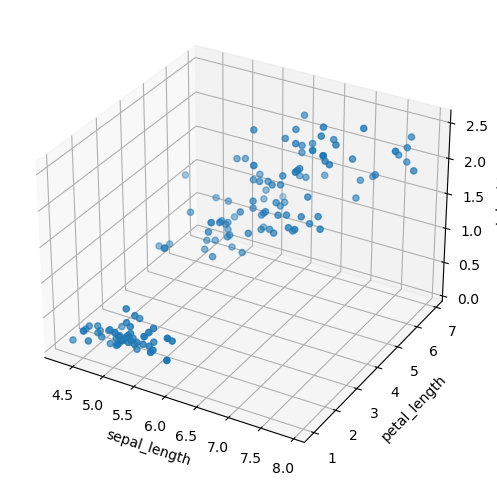

In [5]:
# 3D scatter plot
fig = plt.figure(figsize = (6, 6))
axs = fig.add_subplot(projection = '3d')
axs.scatter(iris.sepal_length, iris.petal_length, iris.petal_width, marker = 'o')
axs.set_xlabel('sepal_length')
axs.set_ylabel('petal_length')
axs.set_zlabel('petal_width')

#### 3D color scatter plot
- we can use colors to visualize the class labels of the datapoints

##### first we need to convert string labels to numerical labels

- we can use pd.map()

In [8]:
species_map = {species: i for i, species in enumerate(iris.species.unique())}
species_map

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [10]:
iris.species.map(species_map)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

- to map strings to integers it is easier to use ***df.Series..factorize()***

In [12]:
# factorize() returns a tuple
iris.species.factorize()

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

In [14]:
# add a column with numerical class labels
iris['spc'] = iris.species.factorize()[0]
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,spc
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0


In [15]:
from matplotlib.colors import ListedColormap

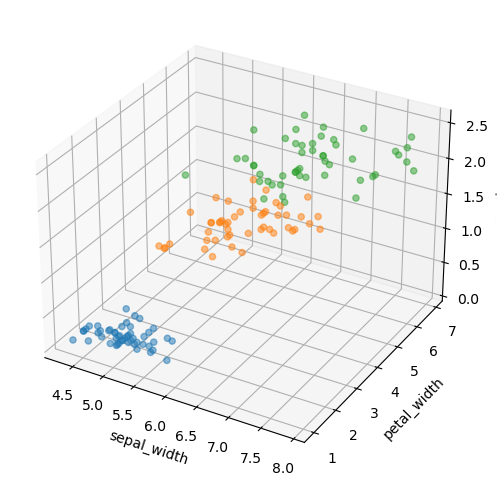

In [18]:
# 3D scatter plot
fig = plt.figure(figsize = (6, 6))
axs = fig.add_subplot(projection = '3d')
# use colors to indicate class label (get colormap from seaborn)
cmap = ListedColormap(sns.color_palette().as_hex()[:3])
# plot sepal_length, petal_length, petal_width (columns 1, 3, 4)
s3d = axs.scatter(iris.sepal_length, iris.petal_length, iris.petal_width, c = iris.spc, cmap = cmap, marker = 'o', s = 20, alpha = 0.5)
axs.set_xlabel(iris.columns[1])
axs.set_ylabel(iris.columns[3])
axs.set_zlabel(iris.columns[4]);